In [2]:
# ベイズ推定による正規分布の推定
#
# 2015/06/13 ver1.0
#

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import normal
from scipy.stats import norm

%matplotlib inline

In [3]:
# 真の分布
mu_true = 2.0
beta_true = 1.0

# 事前分布
mu_0 = -2.0
beta_0 = 1.0


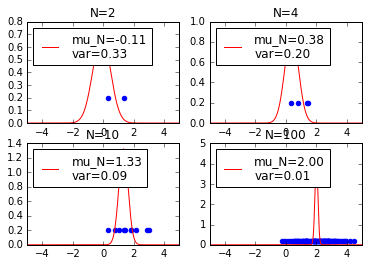

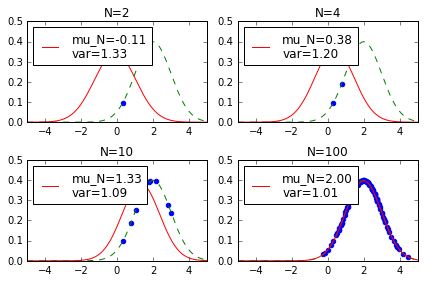

In [5]:
fig1 = plt.figure()
fig2 = plt.figure()
ds = normal(loc=mu_true, scale=1.0/beta_true, size=100)

for c, n in enumerate([2,4,10,100]): # トレーニングセットのデータ数
    trainset = ds[0:n]
    mu_ML = np.mean(trainset)
    mu_N = (beta_true*mu_ML + beta_0*mu_0/n)/(beta_true+beta_0/n)
    beta_N = beta_0 + n*beta_true

    # 平均μの推定結果を表示
    subplot = fig1.add_subplot(2,2,c+1)
    subplot.set_title("N=%d" % n)
    linex = np.arange(-10,10.1,0.01)

    # 平均μの確率分布
    sigma = 1.0/beta_N
    mu_est = norm(loc=mu_N, scale=np.sqrt(sigma))
    label = "mu_N=%.2f\nvar=%.2f" % (mu_N, sigma)
    subplot.plot(linex, mu_est.pdf(linex), color='red', label=label)
    subplot.legend(loc=2)

    # トレーニングセットを表示
    subplot.scatter(trainset, [0.2]*n, marker='o', color='blue')
    subplot.set_xlim(-5,5)
    subplot.set_ylim(0)


    # 次に得られるデータの推定分布を表示
    subplot = fig2.add_subplot(2,2,c+1)
    subplot.set_title("N=%d" % n)
    linex = np.arange(-10,10.1,0.01)

    # 真の分布を表示
    orig = norm(loc=mu_true, scale=np.sqrt(1.0/beta_true))
    subplot.plot(linex, orig.pdf(linex), color='green', linestyle='--')

    # 推定分布を表示
    sigma = 1.0/beta_true+1.0/beta_N
    mu_est = norm(loc=mu_N, scale=np.sqrt(sigma))
    label = "mu_N=%.2f\nvar=%.2f" % (mu_N, sigma)
    subplot.plot(linex, mu_est.pdf(linex), color='red', label=label)
    subplot.legend(loc=2)

    # トレーニングセットを表示
    subplot.scatter(trainset, orig.pdf(trainset), marker='o', color='blue')
    subplot.set_xlim(-5,5)
    subplot.set_ylim(0)

plt.tight_layout()